# Modèle d'Ising

Le modèle d'Ising est un modèle que nous allons ici utiliser pour étudier la transition ferromagnétique d'un matériau en fer à température ambiante.

Lorsque un matériau ferromagnétique est plongé, puis retiré d'un champs mangétique assez fort, alors le morceau de fer adopte les propriétés d'un aimant en l'absence de champ extérieur. Cette propriété n'est plus valable lorsque la température du matériau a atteint sa température de Curie $T_{c}$ qui est propre à chaque matériau. Pour la fer, $T_{c}= 1043K$

On utilise donc ici le modèle d'Ising pour étudier la transition de phases du matériau en fer à sa température de Curie.

Ce modèle représente un réseau en grille de moments magnétiques, appelés dipôles, distribués de manière régulière et qui sont orientés suivant le même axe spacial et ne pouvant pointer que vers le haut ou vers le bas. Ces dipôles représentent les atomes de fer qui constituent le matériau et jouent le rôle de petits aimants orientés dans différentes directions.


On peut exprimer l'énergie totale de ce systèmes par 

$$
E=-J\sum_{paires(i,j)} s_i s_j,
$$

Où on a considéré que chaque dipôle individuel n'intéragissait qu'avec leurs plus proches voisins.
$s_i$ représente le spin du i-ème dipôle et peut valoir "1" ou "-1" selon la direction qu'il prend: si il pointe vers le haut, il vaudra "1", et si il pointe vers le bas, il vaudra "-1". $J$ est la constante de couplage d'une paire de dipôles. Elle est la même pour chaque couple et toujours positive.

Lorsqu'un dipôle change de direction, son énergie change par

$$
\Delta E = 2{J} s_i \sum_{j \in n(i)} s_j
$$

où $n(i)$ est l'ensemble des plus proches voisins du i-ème dipôle.

En connaissant la probabilité de trouver le système dans une certaine configuration $X$ 

$$
p(X) = \frac{e^{-\beta E_X}}{Z}
$$

avec $E_x$ l'énergie potentielle de la configuration du système, $\beta=1/k_B T$ et $Z=\sum_X e^{-\beta E_X}$
la fonction de partition de l'ensemble canonique,

pour chaque configuration $X$ possible, on peut calculer les moyennes de l'énergie totale et de la magnétisation totale du système.

$$
<E> = \frac{\sum_X E_X e^{-\beta E_X}}{Z}\\
<M> = \frac{\sum_X M_X e^{-\beta E_X}}{Z}
$$

Tout l'interêt est d'utiliser le résultat
$$
 <M> \left\{
    \begin{array}{ll}
        = 0 \mbox{ si  } T > T_{c} \\
        \neq 0 \mbox{ si  } T<T_{c}
    \end{array}
\right.
$$

Si on pose $\alpha=J/(k_b T)$, alors on peut réécrire:

$$
\Delta E = 2{\alpha} s_i \sum_{j \in n(i)} s_j \\
p_{\rm flip}=e^{-\Delta E}
$$


pour décrire la transition de phase. 

Dans la leçon "06_04_Ising_Model" du notebook, on a utilisé l'algorithme de Metropolis Monte Carlo qui consiste à n'utiliser que $k$ configurations de grilles possibles pour réécrire les moyennes comme 

$$
<E> = \frac{\sum_k E_k}{N_k}\\
<M> = \frac{\sum_k M_k}{N_k}
$$

L'avantage étant que sommer sur toutes les configurations de grilles possibles reviendrait à sommer beaucoup trop d'éléments. 
Cet algorithme fonctionne de la manière suivante: on part d'une configuration initiale de spins aléatoire et on en choisit un de manière aléatoire dans la grille. Par la suite, on a deux possibilités de configurations de grille qui se présentent à nous selon la valeur de l'énergie du spin en [iy,ix] influencé par ses 4 voisins lorsqu'il est inversé ou non. La probabilité $p_{\rm flip}$ que la configuration de grille soit choisie dans les $k$ états pris pour calculer les moyennes et que cette configuration soit choisie commme nouvelle configuration du système est donnée par:

$$
 p_{\rm flip}=\left\{
    \begin{array}{ll}
         1 \mbox{ si  } E_{flip}<E_{initial} \\
         e^{-\beta\Delta E} \mbox{ si  } E_{flip}>E_{initial}\\
         0 \mbox{ si } E_{flip}=E_{initial}
    \end{array}
\right.
$$

Avec $E_{flip}$ et $E_{initial}$ les énergies du spin inversé et initial, respectivement. Dans ce cas là, $\Delta E = E_{flip}-E_{initial}$.
Si  $p_{\rm flip}=0$ alors on garde la configuration initiale comme nouvelle configuration.

Si on revient aux définitions des moyennes des énergies et des magnétisations des différents états du système, $E_k$ et $M_k$ sont l'énergie et la magnétisation de la configuration $k$ générée  après $N_k$ itérations de l'algorithme de Metropolis.


## Challenges

Pour faire les challenges demandés, on va utiliser les définitions données dans le notebook 06_04_Ising_Model. 

Tout d'abord, on commence par importer une série d'éléments à partir de la bibliothèque numpy ainsi qu'à partir de matplotlib pour pourvoir représenter nos résultats numériques ainsi que pour créer des animations en couleurs. 

In [2]:
%matplotlib inline
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML
from numpy import exp

La première fonction "energy_at_site" permet de trouver l'énergie d'un spin à la position [ix,iy] en considérant la contribution de ses 4 spins voisins les plus proches en prenant un tableau initial de spin sp, $\alpha =J/k_BT$ la relation avec la constante de couplage $J$ et $\sigma$ la valeur du spin à la position [ix,iy] valant 1 ou -1. 

In [3]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Donne la contribution de l'énergie pour un spin donné à la position
    ix,iy pour une grille avec des conditions aux bords périodiques
   
    Paramètres:
    ----------
    sp: numpy array
        grille de spins
    alpha  : réel
        constante de couplage J/(kb*T)
    sigma   : entier
        spin à la position ix,iy
    ix   : entier
        position en x
    iy   : entier
        position en y
    
   
    Returns:
    -------
    energy: energie de la configuration donnée
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy



La deuxième fonction "metropolis_at_site" décrit l'algorithme de Metropolis. Cette fonction prend comme varialbes un grille $sp$, la constante de couplage $\alpha$, ainsi que la position [ix,iy] d'un élement de la grille sp. On choisit la valeur du spin à la position [ix,iy]. On définit energy_before_flip comme étant l'énergie du spin avec la contribution de ses 4 voisins avant son inversion. Ensuite, on inverse le spin et on définit energy_if_site_flipped comme étant l'énergie du spin avec la contribution de ses 4 voisins après son inversion. Ensuite, on introduit une boucle if pour pouvoir, de manière probabiliste, changer la configuration des spins d'une grille. Grace au générateur de nombre aléatoire "numpy.random_sample", qui prend aléatoirement une valeur entre 0 et 1, on implémente cette probabilité. De plus, on inverse toujours le spin du site si la configuration finale est moins énergétique que la configuration initiale.

In [4]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        grille de spins
    alpha  : real
        constante de couplage J/(kb*T)
    ix   : int
        position en x
    iy   : int
        position en y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

### CHALLENGE 1 

- "Check that this is not a coincidence and that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations.
You may use the following routine to generate different ones with random initial dipole orientations."

Dans le notebook, on a testé l'algorithme de Metropolis en prenant une grille dont les spins, à l'exception de celui à la position [ix,iy], sont fixés à tous les instants. On en a déduit que dans ce cas de figure, l'algorithme marchait bien et on a obtenu comme résulat que la configuration avec les spins downs est la configuration qui a la plus petite énergie et que 

$$
\frac{p({\rm up})}{p({\rm downs})} = e^{-\Delta E}=e^{0.4}\approx 1.49
$$

Le but de ce premier challenge est de tester l'algorithme en prenant des configurations aléatoires de grilles de spins et de montrer qu'on obtient les mêmes résultats.

Tout d'abord, on définit "initial_state" qui prend comme paramètres nx et ny qui sont les discrétisations selon x et selon y de la grille, respectivement, renvoyant une grille avec des spins orientés de manière aléatoire.

In [5]:
def initial_state(nx,ny):
    """ Créé une grille de spins orientés de manière aléatoire
   
    Paramètres:
    ----------
    nx   : entier
        points de discrétisation selon x
    ny   : entier
        points de discrétisation selon y
   
    Return:
    -------
    r: matrice en 2 dimension de spins
    """
       
    # spin aléatoires uniformément distribués entre 0 et 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # à r=0, on pose un spin négatif
    r[r==0] =-1

    return r

On va tester l'algorithme pour une grille 10x10 et on initilise la grille r grâce à la défintion précédente en prenant $\alpha =0.1$

On peut représenter cette grille r sous forme d'une figure ou chaque carré représente un spin. Les spin ups (+1) et downs(-1) sont représentés par des carrés jaunes et bleus, respectivement.

In [6]:
nx=10
ny=10
r = initial_state(nx,ny)
alpha=0.1

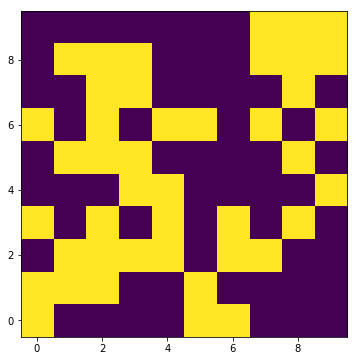

In [7]:
pyplot.figure(figsize=(6,6))
pyplot.imshow(r,interpolation="none",origin='lower')

In [8]:
print(energy_at_site(r,alpha,r[5,5],5,5))
print (r[5,5])

-0.2
-1


On vérifie qu'on obtient bien les bonnes valeurs d'énergies pour, par exemple, le spin à la position [5,5] et c'est bien le cas.

Ici, on va introduire deux petites fonctions qui nous renvoient la valeur du spin à la position [ix,iy]. La première est "spin_at_site" qui nous redonne le spin à la position [ix,iy] d'une grille $r$. La deuxième fonction renvoie le spin à la même position [ix,iy], mais cette fois-ci inversé, de cette même grille $r$.

In [9]:
def spin_at_site(r,ix,iy):
    """ Donne le spin d'une position dans la grille de spins r. 
   
    Parameters:
    ----------
    r: numpy array
        grille de spins
    alpha  : réll
        constante de couplage J/(kb*T)
    ix   : int
        position en x
    iy   : int
        position en y
        
    Returns:
    -------
    r[ix,iy] le spin du site à la position ix,iy
    """
    
    return r[ix,iy]


def flipped_spin_at_site(r,ix,iy):
    """ Donne le spin inversé d'une position dans la grille de spins r. 
   
    Parameters:
    ----------
    r: numpy array
        grille de spins
    alpha  : réel
        constante de couplage J/(kb*T)
    ix   : int
        position en x
    iy   : int
        position en y
    
    Returns:
    -------
    -r[ix,iy] le spin inversé du site à la position ix,iy
    """
    
    return -r[ix,iy]

In [10]:
energy_at_site_i = energy_at_site(r,alpha,spin_at_site(r,5,5),5,5)   #Energie de l'état initial.
energy_at_site_f = energy_at_site(r,alpha,flipped_spin_at_site(r,5,5),5,5) #Energie de l'état final.

print(energy_at_site_i)
print(energy_at_site_f)

-0.2
0.2


A présent, on va tester l'algorithme de Metropolis en prenant le spin à la position [5,5] de la grille. On place tous les états récoltés dans une liste "states" et on calcule ensuite le nombre de fois qu'on a obtenu la configuration up et down du spin en [5,5]. Un dernier petit calcul permet ensuite d'avoir le rapport $\frac{p({\rm up})}{p({\rm downs})}$ et on a bien un résultat similaire à ce qu'on désirait. 

Il faut faire bien attention lors de la comparaison de $e^{-\Delta E}$ et $\frac{p({\rm up})}{p({\rm downs})}$. En effet on doit regarder le ratio $\frac{p({\rm up})}{p({\rm downs})}$ dans le cas ou l'état initial est un état de spin up, mais sinon on doit regarder le ratio $\frac{p({\rm down})}{p({\rm up})}$ dans le cas ou l'état initial est un état de spin down. 

In [11]:
if (spin_at_site(r,5,5) < 0):
    print (exp(-(energy_at_site_f - energy_at_site_i)))
else :
    print (exp(-(energy_at_site_i - energy_at_site_f)))

    
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=r[5,5]

for n in range(0,NMC):
    metropolis_at_site(r,alpha,5,5)
    states[n]=r[5,5]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print (ups/downs)

0.6703200460356393
0.6662778684973506


On a aussi testé l'algorithme pour des grilles r_1 et r_2 dans lesquelles on a fixé les 4 valeurs de spins voisins à -1 autour du spin central et les valeurs de spins voisins à 1 sauf pour celui du dessous qu'on a fixé à -1, respectivement pour r_1 et r_2.

In [12]:
nx=10
ny=10
r_1 = initial_state(nx,ny)
r_1[4,5]=r_1[5,4]=r_1[5,6]=r_1[6,5]=-1

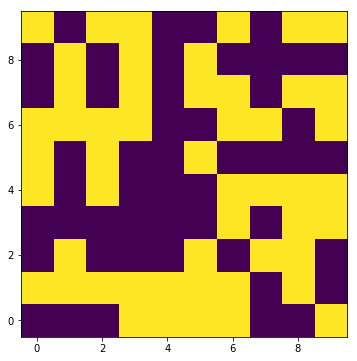

In [13]:
pyplot.figure(figsize=(6,6))
pyplot.imshow(r_1,interpolation ="none",origin="lower")

In [14]:
energy_at_site_i1 = energy_at_site(r_1,alpha,spin_at_site(r_1,5,5),5,5)
energy_at_site_f1 = energy_at_site(r_1,alpha,flipped_spin_at_site(r_1,5,5),5,5)

print(energy_at_site_i1)
print(energy_at_site_f1)

0.4
-0.4


In [15]:
if (spin_at_site(r_1,5,5) < 0):  
    print (exp(-(energy_at_site_f1 - energy_at_site_i1)))
else :
    print (exp(-(energy_at_site_i1 - energy_at_site_f1)))

NMC = 100000
states = numpy.empty(NMC+1)
states[0]=r_1[5,5]

for n in range(0,NMC):
    metropolis_at_site(r_1,alpha,5,5)
    states[n]=r_1[5,5]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print (ups/downs)

0.44932896411722156
0.4503683935719673


In [16]:
nx=10
ny=10
r_2 = initial_state(nx,ny)
r_2[4,5]=-1
r_2[5,4]=r_2[5,6]=r_2[6,5]=1

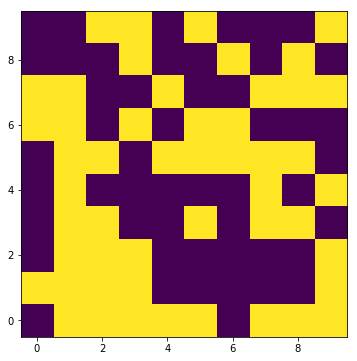

In [17]:
pyplot.figure(figsize=(6,6))
pyplot.imshow(r_2,interpolation ="none",origin="lower")

In [18]:
energy_at_site_i2 = energy_at_site(r_2,alpha,spin_at_site(r_2,5,5),5,5)
energy_at_site_f2 = energy_at_site(r_2,alpha,flipped_spin_at_site(r_2,5,5),5,5)

print(energy_at_site_i2)
print(energy_at_site_f2)

-0.2
0.2


In [19]:
if (spin_at_site(r_2,5,5) < 0):  
    print (exp(-(energy_at_site_f2 - energy_at_site_i2)))
else:
    print (exp(-(energy_at_site_i2 - energy_at_site_f2)))

NMC = 100000
states = numpy.empty(NMC+1)
states[0]=r_2[5,5]

for n in range(0,NMC):
    metropolis_at_site(r_2,alpha,5,5)
    states[n]=r_2[5,5]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print (ups/downs)

1.4918246976412703
1.4984384759525298


On constate, que l'algorithme de Metropolis nous donne la bonne proportion de spins ups et downs pour ces configurations!

## Challenge n°2

- " Perform a series of runs with $\alpha \in [0 1]$ and plot the average energy of the system and its magnetisation as a function of $\alpha$. Estimate the critical value of $\alpha$ at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?"

Pour ce challenge, on va tout d'abord utiliser la définition "ising_model_metropolis" du notebook qui nous renvoie une séquence d'états du système pour le modèle d'Ising en utilisant l'agorithme de Metropolis. Pour laisser une chance au système de changer de manière significative, on effectue $(nx*ny)$ fois l'algorithme de métropolis pour un spin donné à la position [ix,iy]. A la fin de la boucle j, on place la dernière configuration obtenue pour 1 spin donné dans un tableau "states".

In [20]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Créé une séquence d'états pour le model d'Ising en utilisant l'algorithme 
    de Metropolis.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    nx   : entier
        points de discrétisation selon x
    ny   : entier
        points de discrétisation selon y
    NMC  : int
        Nombre d'états à créer
    alpha  : réel
        constante de couplage J/(kb*T)
    Returns:
    -------
    states: séquence d'états
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy) 
        states[i]=sp.copy()   
    return states

A présent, on va refaire l'analyse faite précédement avec différentes valeurs de $\alpha \in [0,1]$ et voir ce qu'on obtient comme évolution des dipôles de la grille au cours des NMC itérations. Pour cela, on va représenter les différents états sous forme d'animations, chacune correspondant à un alpha différent.

Pour chaque alpha, on a initialisé tous les spins de la grille comme ups.

In [21]:
nx=50
ny=50

NMC=100
sp = numpy.ones([nx,ny])
alpha=0.1
states_0_1 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

alpha=0.2
sp = numpy.ones([nx,ny])
states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=0.4
states_0_4 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=0.55
states_0_55 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=0.7
states_0_7 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=1.0
states_1 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

Regardons ce que l'animation nous donne:

In [22]:
fig = pyplot.figure(figsize=(6,3))

pyplot.subplot(1, 3, 1)
img01 = pyplot.imshow(states_0_1[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 3, 2)
img02 = pyplot.imshow(states_0_2[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 3, 3)
img04 = pyplot.imshow(states_0_4[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img01.set_array(states_0_1[i])
    img02.set_array(states_0_2[i])
    img04.set_array(states_0_4[i])
    
anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
pyplot.close()
HTML(anim.to_html5_video())

In [23]:
fig = pyplot.figure(figsize=(6,3))

pyplot.subplot(1, 3, 1)
img055 = pyplot.imshow(states_0_55[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 3, 2)
img07 = pyplot.imshow(states_0_7[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 3, 3)
img1 = pyplot.imshow(states_1[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

def animate(i):
    img055.set_array(states_0_55[i])
    img07.set_array(states_0_7[i])
    img1.set_array(states_1[i])
    
anim1 = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
pyplot.close()
HTML(anim1.to_html5_video())   

On remarque que plus $\alpha$ augmente, plus il y a de spins ups qui composent la grille par rapport aux spins downs. De manière physique, ceci est tout à fait plausible car $\alpha=J/(k_b T)$, et donc plus alpha augmente, plus T diminue. Si la température diminue, alors on aura moins de fluctuations thermiques et donc les spins s'inversent moins à partir de la configuration initiale. De manière plus mathématique on tend vers une grille de spins up car c'est la configuration de spins dont la probabilité d'exister est la plus grande selon la statistique. De plus, elle correspond à une énergie du système plus petite.

A présent, on va calculer l'énergie et la magnétisation moyenne du système pour une série de alpha différents pour pouvoir, par la suite, estimer à partir duquel on observe la transition de phase. Dans toute cette partie, on va tenir en compte la transition des états de spins dans le calcul de la moyenne de l'energie et de la magnétisation, pour ensuite les adapter en ne prenant plus en compte la phase de transition qui pourrait fausser nos valeurs car la phase de transition ne correspond pas à l'équilibre du système.

On commence par définir "energy_one_config" qui nous renvoie l'énergie d'une configuration donnée en prenant comme paramètres une grille sp_test de taille $nx*ny$ et un $\alpha$. On initialise l'énergie de départ de la grille comme étant nulle et on n'oublie pas de diviser l'énergie totale par deux car la somme s'effectue à chaque fois sur une paire de spins! 

In [24]:
def energy_one_config(sp_test,alpha):
    """ Calcule l'energie d'une grille de spins.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    
    Returns:
    -------
    Energie_tot/2 = energie totale de la configuration divisée par deux
    car on somme sur les paires de spins
    """
    nx=ny=len(sp_test[0])
    Energie_tot= 0
    for m in range(nx):
        for l in range(ny):
            sigma=sp_test[l,m]
            Energie_tot=energy_at_site(sp_test,alpha,sigma,m,l)+Energie_tot
    return Energie_tot/2 

Ensuite, on définit "average_energy" qui renvoie un tableau dont les éléments i sont les énergies moyennes des i+1 états de spins suivant la formule:

$$<E> = \frac{\sum_k E_k}{N_k}$$

Cette fonction prend comme paramètres un ensemble d'états de spins "states", c'est-à-dire une liste de grilles, une constante de couplage alpha et NMC le nombre d'itérations utilisées pour calculer un état de spins à partir d'un état initial, par l'algorithme de Metropolis. On initialise l'énergie moyenne à l'énergie de l'état initial state[0]. Au final, la dimension de en_moy_norm sera NMC+1. Par exemple, state[5] contiendra l'energie moyenne des 6 premières configurations de grilles de spins.


In [25]:
def average_energy(states,alpha,NMC):
    """ Calcule l'energie moyenne d'une succéssion de configurations, pour 
     un même alpha.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    
    Returns:
    -------
    en_moy_norm = liste des énergies moyennes pour chaque suite d'états.
    """
    
    en_moy_norm = numpy.empty(NMC+1)
    en_moy_norm[0] =  energy_one_config(states[0],alpha)
    en_moy_non_norm = numpy.zeros(NMC+1)
    en_moy_non_norm[0] = energy_one_config(states[0],alpha)
    
    for n in range(1,NMC+1):
        en_moy_non_norm[n] = (energy_one_config(states[n],alpha) + en_moy_non_norm[n-1])
    
    for m in range(1,NMC+1):
        en_moy_norm[m]=(en_moy_non_norm[m]/(m+1))
        
    return en_moy_norm

De la même manière, on définit "magn_one_config"  qui nous renvoie la magnétisation d'une configuration donnée en prenant comme paramètres une grille sp_test de taille $nx*ny$. On initialise la magnétisation de départ de la grille comme étant nulle. 

In [26]:
def magn_one_config(sp_test):
    """ Calcule la magnétisation d'une grille de spins.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    
    Returns:
    -------
    magn_tot = magnétisation totale de la configuration.
    """
    nx=ny=len(sp_test[0])
    magn_tot=0.
    for m in range(nx):
        for l in range(ny):
            sigma=sp_test[l,m]
            magn_tot=sigma+magn_tot
    return magn_tot   

Pour vérifier rapidement que cette fonction nous donne le bon résultat, nous définissons une petite grille sp, de taille $3 \times 3$, dont le spins sont tous des "up", c'est-à-dire que la grille est entièrement constituée de 1 sur toutes les positions. Pour cette grille, la magnétisation devrait être de 9.

In [27]:
nx=ny=3
sp=numpy.ones((nx,ny))
magn_one_config(sp)

9.0

Pour une autre grille $3\times3$, mais cette fois avec 6 spins "down" et 3 "up", on dervait avoir une magnétisation de -3.Vérifions:

In [28]:
nx=ny=3
sp=numpy.ones((nx,ny))
sp[0,:]=sp[1,:]=-1
print(sp)
magn_one_config(sp)

[[-1. -1. -1.]
 [-1. -1. -1.]
 [ 1.  1.  1.]]


-3.0

C'est bon! Continuons.

Ensuite, on définit "average_magn" qui renvoie un tableau dont les éléments i sont les magnétisations moyennes des i+1 états de spins suivant

$$<M> = \frac{\sum_k M_k}{N_k}$$

Cette fonction prend comme paramètres un ensemble d'états de spins states et  NMC le nombre d'itérations utilisées pour calculer un état de spins à partir d'un état initial, par l'algorithme de Metropolis.. On initialise la magnétisation moyenne à la magnétisation de l'état initial state[0]. Au final, la dimension de magn_moy_norm sera NMC+1. Par exemple, states[5] contiendra la magnétisation moyenne des 6 premières configurations.



In [29]:
def average_magn(states,NMC):
    """ Calcule la magnétisation moyenne d'une succéssion de configurations.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    
    Returns:
    -------
    magn_moy_norm = liste des magnétisations moyennes pour chaque suite d'états.
    """
    
    magn_moy_norm = numpy.zeros(NMC+1)
    magn_moy_norm[0] =  magn_one_config(states[0])
    magn_moy_non_norm = numpy.zeros(NMC+1)
    magn_moy_non_norm[0] = magn_one_config(states[0])
    
    for n in range(1,NMC+1):
        magn_moy_non_norm[n] = (magn_one_config(states[n]) + magn_moy_non_norm[n-1])
    
    m=1    
    for m in range(1,NMC+1):
        magn_moy_norm[m]= (magn_moy_non_norm[m])/(m+1)
        
    return magn_moy_norm

On va maintenant mettre sous forme de graphiques tous ces résulats. 

On va d'abord faire le graphique de l'évolution de l'énergie moyenne puis de l'évolution de la magnétisation moyenne pour différents alpha.

Commençons d'abord par calculer le alpha critique prédit par Onsager. Le alpha critique correspond au alpha dont la température est la température de Curie, c'est-à-dire la température à partir de laquelle la magnétisation s'annule. On utilise la relation:

$$T_c=\frac{2J}{k_b ln(1+\sqrt{2})}$$

et donc 

$$\alpha_{critique}= ln(1+\sqrt{2})/2$$


On trouve un alpha qui vaut $\alpha_{critique} = 0.44068679351$.
On va voir si on perçoit plus ou moins cette valeur dans les graphiques à suivre.

Cette relation a été trouvée sur le site : https://en.wikipedia.org/wiki/Ising_model

Nous allons tout d'abord prendre différentes valeurs de alpha : 0.2, 0.3, 0.4, 0.5, 0.6 et 0.7 et calculer l' énergie et la magnétisation moyenne des différents grilles, avec ces différents alphas à partir d'un état initial qui est le même, c-à-d une grille 50x50 de spins dont tous les spins sont initialement ups.

In [30]:
NMC=100
nx=50
ny=50

r = numpy.ones((nx,ny))
alpha = 0.2
states_0_2=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_02=average_energy(states_0_2,alpha,NMC)
magn_02=average_magn(states_0_2,NMC)

r = numpy.ones((nx,ny))
alpha = 0.3
states_0_3=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_03=average_energy(states_0_3,alpha,NMC)
magn_03=average_magn(states_0_3,NMC)

r = numpy.ones((nx,ny))
alpha = 0.4
states_0_4=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_04=average_energy(states_0_4,alpha,NMC)
magn_04=average_magn(states_0_4,NMC)


r = numpy.ones((nx,ny))
alpha = 0.44068679351   #Solution exacte de Onsanger
states_0_4406867935=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_04406867935=average_energy(states_0_4406867935,alpha,NMC)
magn_04406867935=average_magn(states_0_4406867935,NMC)

r = numpy.ones((nx,ny))
alpha = 0.5
states_0_5=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_05=average_energy(states_0_5,alpha,NMC)
magn_05=average_magn(states_0_5,NMC)

r = numpy.ones((nx,ny))
alpha = 0.6
states_0_6=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_06=average_energy(states_0_6,alpha,NMC)
magn_06=average_magn(states_0_6,NMC)

r = numpy.ones((nx,ny))
alpha = 0.7
states_0_7=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_07=average_energy(states_0_7,alpha,NMC)
magn_07=average_magn(states_0_7,NMC)

Si nous représentons ces 7 résultats sous forme de graphiques, nous obtenons:

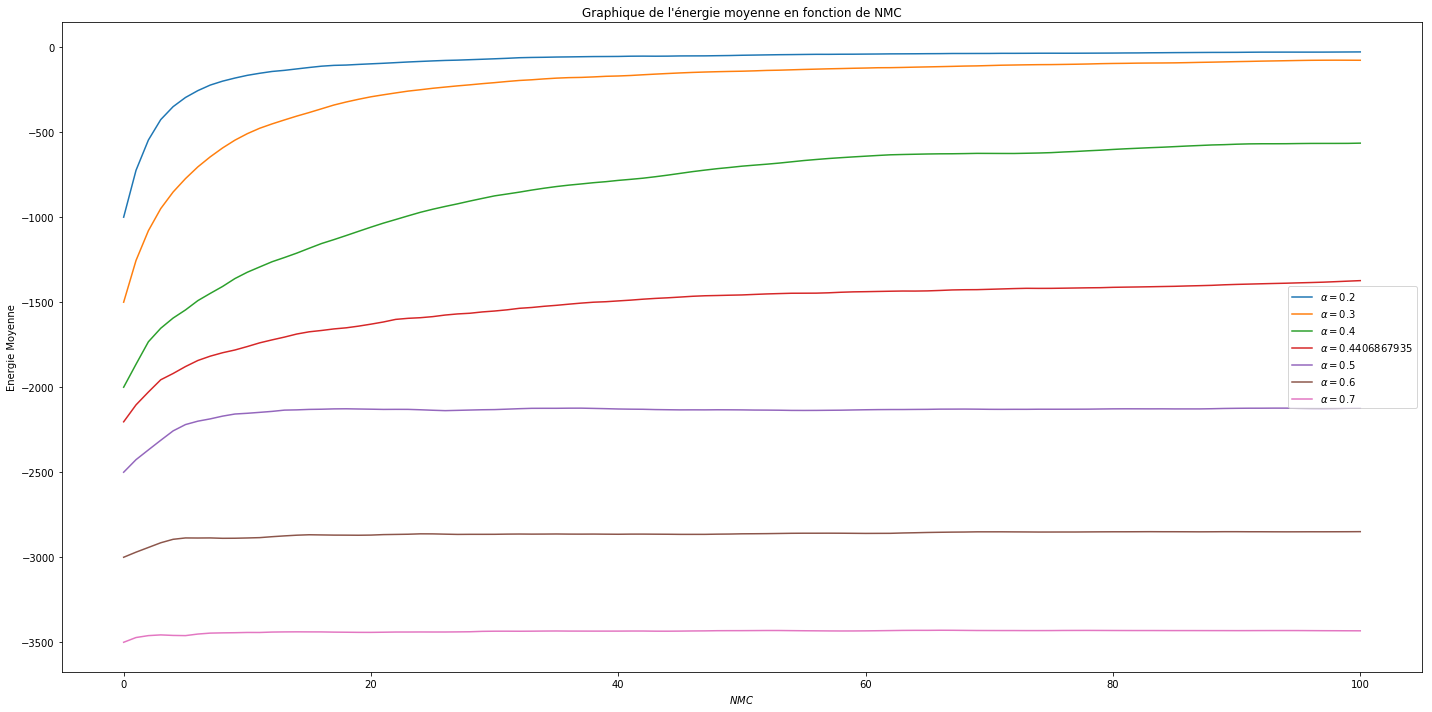

In [31]:
NMC_grid = numpy.arange(0,101,1)
pyplot.figure(figsize=(20,10))

pyplot.title("Graphique de l'énergie moyenne en fonction de NMC")
pyplot.xlabel('$NMC$')
pyplot.ylabel("Energie Moyenne")

pyplot.plot(NMC_grid,energy_02,label=r'$\alpha=0.2$')
pyplot.plot(NMC_grid,energy_03,label=r'$\alpha=0.3$')
pyplot.plot(NMC_grid,energy_04,label=r'$\alpha=0.4$')
pyplot.plot(NMC_grid,energy_04406867935,label=r'$\alpha=0.4406867935$')
pyplot.plot(NMC_grid,energy_05,label=r'$\alpha=0.5$')
pyplot.plot(NMC_grid,energy_06,label=r'$\alpha=0.6$')
pyplot.plot(NMC_grid,energy_07,label=r'$\alpha=0.7$')

pyplot.tight_layout()
pyplot.legend()


On a donc que pour des alpha grands, c'est à dire de basses températures, le système garde son énergie initiale ce qui est tout à fait logique. En effet puisqu'il est plus froid, l'énergie thermique est moindre, et donc les fluctuations le sont aussi. Par contre, dans le cas où alpha est grand, la transition se fait de manière rapide, et le système adopte une configuration plus favorable vis-à-vis de l'énergie. On voit aussi que pour des alphas proches de la valeur théorique de Onsäger, la transition est plus lente.

Ce graphique nous donne une information capitale sur le nombre d'itérations à faire pour que le système soit à l'équilibre, en fonction d'alpha. On va utiliser ce graphique pour calculer les moyennes qui nous intéressent réellement, c'est-à-dire celles qui tiennent en compte le système uniquement lorsqu'il est à l'équilibre. Maintenant, faisons la même chose pour le graphique de la magnétisation en fonction d'alpha.

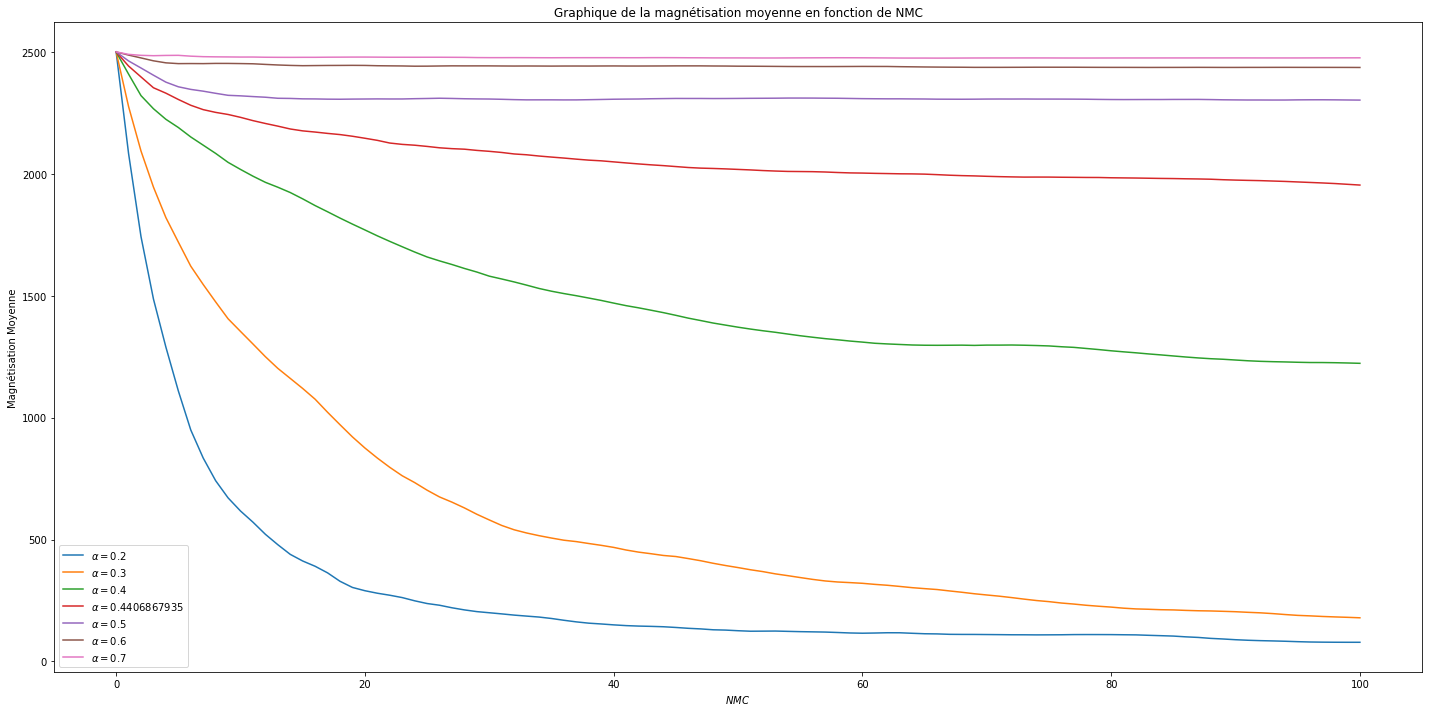

In [32]:
pyplot.figure(figsize=(20,10))

pyplot.title("Graphique de la magnétisation moyenne en fonction de NMC")
pyplot.xlabel('$NMC$')
pyplot.ylabel("Magnétisation Moyenne")

pyplot.plot(NMC_grid,magn_02,label=r'$\alpha=0.2$')
pyplot.plot(NMC_grid,magn_03,label=r'$\alpha=0.3$')
pyplot.plot(NMC_grid,magn_04,label=r'$\alpha=0.4$')
pyplot.plot(NMC_grid,magn_04406867935,label=r'$\alpha=0.4406867935$')
pyplot.plot(NMC_grid,magn_05,label=r'$\alpha=0.5$')
pyplot.plot(NMC_grid,magn_06,label=r'$\alpha=0.6$')
pyplot.plot(NMC_grid,magn_07,label=r'$\alpha=0.7$')

pyplot.tight_layout()
pyplot.legend()

Comme attendu on a bien la magnétisation initiale qui est la même pour tous les alphas et qui décroit de manière plus rapide pour des valeurs de alpha plus petites, car le système sera capable de changer.

Si on refait la même analyse mais avec une grille initiale tout à fait opposée à celle que nous avons utilisée ici, nous devrions obtenir une allure similaire à celle déjà obtenue pour le graphique de l'énergie, et pour celle de la magnétisation. Le graphique est similaire, mais cette fois-ci la magnétisation est négative au départ, et ensuite elle tendra rapidement ou pas vers zéro, en fonction d'alpha, comme pour le graphique obtenu ci-dessus.

In [33]:
NMC=100
nx=50
ny=50

r = numpy.zeros((nx,ny))
r[r==0]=-1
alpha = 0.2
states_0_2=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_02=average_energy(states_0_2,alpha,NMC)
magn_02=average_magn(states_0_2,NMC)

r = numpy.zeros((nx,ny))
r[r==0]=-1
alpha = 0.3
states_0_3=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_03=average_energy(states_0_3,alpha,NMC)
magn_03=average_magn(states_0_3,NMC)

r = numpy.zeros((nx,ny))
r[r==0]=-1
alpha = 0.4
states_0_4=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_04=average_energy(states_0_4,alpha,NMC)
magn_04=average_magn(states_0_4,NMC)


r = numpy.zeros((nx,ny))
r[r==0]=-1
alpha = 0.44068679351   #Solution exacte de Onsanger
states_0_4406867935=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_04406867935=average_energy(states_0_4406867935,alpha,NMC)
magn_04406867935=average_magn(states_0_4406867935,NMC)

r = numpy.zeros((nx,ny))
r[r==0]=-1
alpha = 0.5
states_0_5=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_05=average_energy(states_0_5,alpha,NMC)
magn_05=average_magn(states_0_5,NMC)

r = numpy.zeros((nx,ny))
r[r==0]=-1
alpha = 0.6
states_0_6=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_06=average_energy(states_0_6,alpha,NMC)
magn_06=average_magn(states_0_6,NMC)

r = numpy.zeros((nx,ny))
r[r==0]=-1
alpha = 0.7
states_0_7=ising_model_metropolis(r,NMC,nx,ny,alpha)
energy_07=average_energy(states_0_7,alpha,NMC)
magn_07=average_magn(states_0_7,NMC)

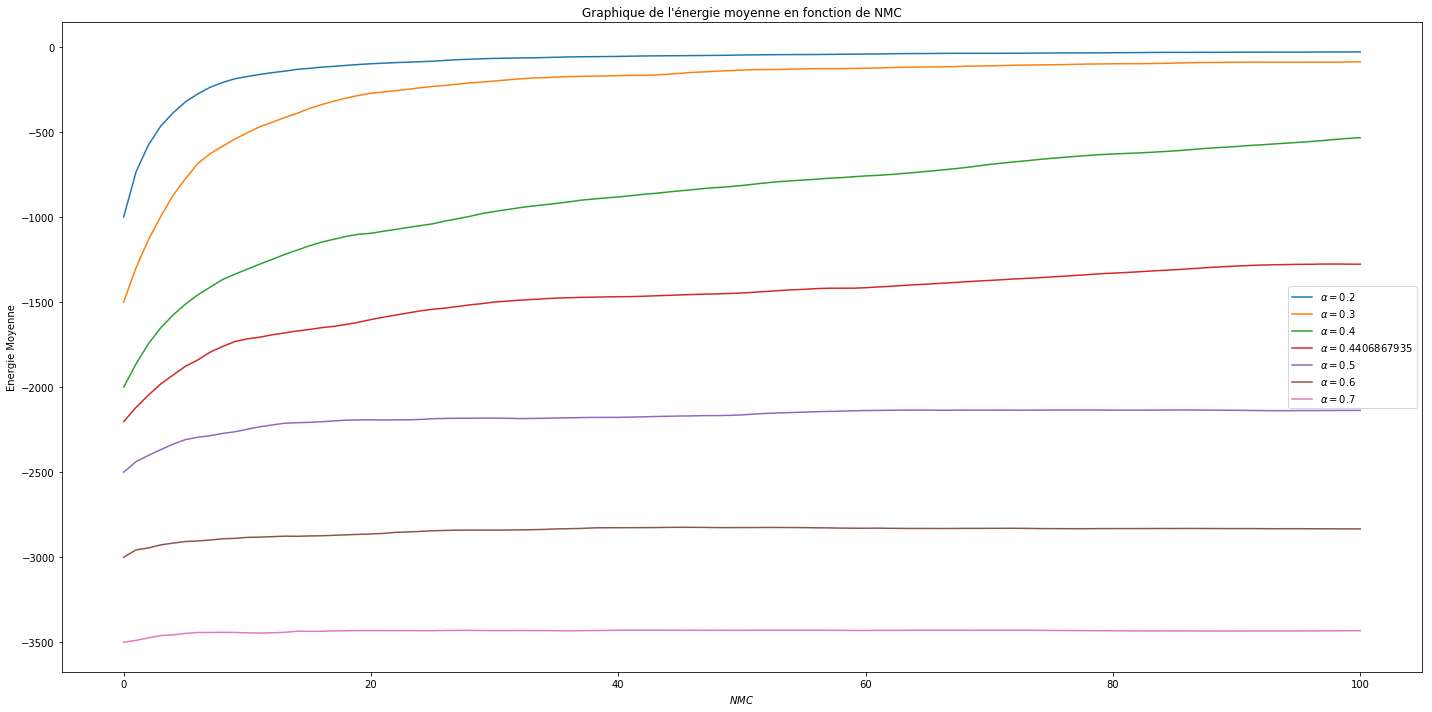

In [34]:
NMC_grid = numpy.arange(0,101,1)
pyplot.figure(figsize=(20,10))

pyplot.title("Graphique de l'énergie moyenne en fonction de NMC")
pyplot.xlabel('$NMC$')
pyplot.ylabel("Energie Moyenne")

pyplot.plot(NMC_grid,energy_02,label=r'$\alpha=0.2$')
pyplot.plot(NMC_grid,energy_03,label=r'$\alpha=0.3$')
pyplot.plot(NMC_grid,energy_04,label=r'$\alpha=0.4$')
pyplot.plot(NMC_grid,energy_04406867935,label=r'$\alpha=0.4406867935$')
pyplot.plot(NMC_grid,energy_05,label=r'$\alpha=0.5$')
pyplot.plot(NMC_grid,energy_06,label=r'$\alpha=0.6$')
pyplot.plot(NMC_grid,energy_07,label=r'$\alpha=0.7$')

pyplot.tight_layout()
pyplot.legend()


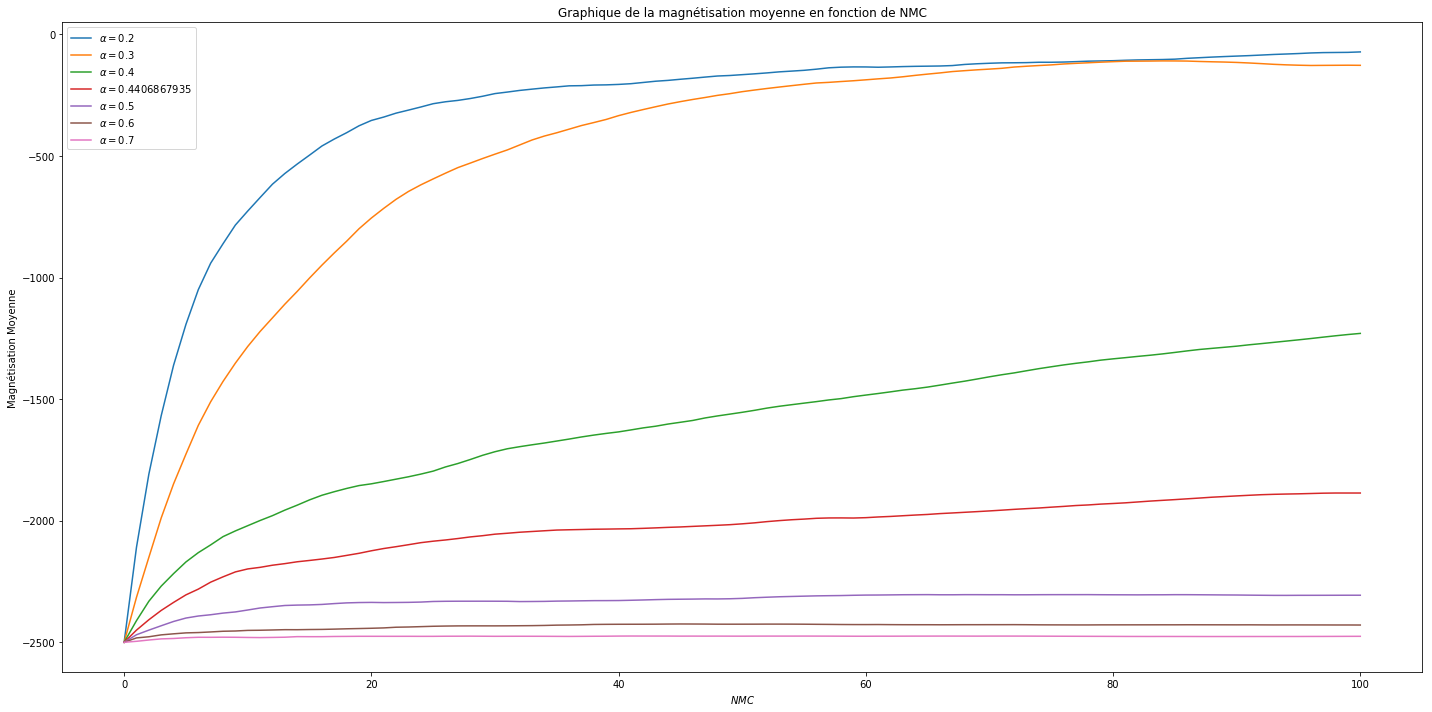

In [35]:
pyplot.figure(figsize=(20,10))


pyplot.title("Graphique de la magnétisation moyenne en fonction de NMC")
pyplot.xlabel('$NMC$')
pyplot.ylabel("Magnétisation Moyenne")

pyplot.plot(NMC_grid,magn_02,label=r'$\alpha=0.2$')
pyplot.plot(NMC_grid,magn_03,label=r'$\alpha=0.3$')
pyplot.plot(NMC_grid,magn_04,label=r'$\alpha=0.4$')
pyplot.plot(NMC_grid,magn_04406867935,label=r'$\alpha=0.4406867935$')
pyplot.plot(NMC_grid,magn_05,label=r'$\alpha=0.5$')
pyplot.plot(NMC_grid,magn_06,label=r'$\alpha=0.6$')
pyplot.plot(NMC_grid,magn_07,label=r'$\alpha=0.7$')

pyplot.tight_layout()
pyplot.legend()

Comme prévu nous avons la même allure de graphique pour l'énergie et la même allure pour la magnétisation mais cette fois-ci la magnétisation est d'abord négative et ensuite elle se stabilise vers zéro plus ou moins rapidement en fonction de alpha.

Néanmoins, ces deux représentations ne nous permettent pas vraiment de tirer une conclusion sur la valeur du alpha critique car on prend en compte la phase de transition. Notamment pour les valeurs de alpha entre $[0,0.3]$ et $[0.6,1]$ on détermine de manière graphique que l'état d'équilibre est atteint après 35 itérations de l'algorithme Ising_model_metropolis . On utilisera l'état obtenu à la 35eme itération comme état initial pour le calcul de la moyenne pour ces valeurs de alpha.

Par contre, pour des valeurs entre ces deux intervalles on va prendre un nombre d'itération beaucoup plus grand car l'équilibre n'est atteint qu'après beaucoup plus d'itérations.

Définissons maintenant des fonction qui calculent les moyennes en s'adaptant à ces valeurs de alpha.

Nous définissons "average_energy_function_alpha" qui prend les mêmes variables que la fonction "average_energy", mais aussi un indice j, que nous allons définir nous même, et qui correpond à l'indice pour lequel on va considérer que l'état $j-1$ du vecteur de grilles "states" est à l'état d'équilibre. C'est à partir de cet état là que nous allons calculer la moyenne des l'énergie et de la magnétisation.

In [36]:
def average_energy_function_alpha(states,alpha,NMC,j):
    """ Calcule l'energie moyenne d'une succession de configurations, pour 
     un même alpha, en commençant où l'état d'équilibre est atteint.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis
    j : int
        Indice qui caractérise l'état à partir duquel on considère que le système est à l'équilibre
    
    Returns:
    -------
    en_moy_norm = liste des énergies moyennes pour chaque suite d'états, à partir du moment ou l'état d'équilibre est atteint.
    """
    en_moy_norm = numpy.empty(NMC+1-j+1)
    en_moy_norm[0] =  energy_one_config(states[j-1],alpha)
    en_moy_non_norm = numpy.zeros(NMC+1-j+1)
    en_moy_non_norm[0] = energy_one_config(states[j-1],alpha)

    for n in range(1,NMC+1-j+1):
        en_moy_non_norm[n] = (energy_one_config(states[n+j-1],alpha) + en_moy_non_norm[n-1])
     
    for m in range(1,NMC+1-j+1):
        en_moy_norm[m]=(en_moy_non_norm[m]/(m+1))
        
        
    return en_moy_norm

Il est difficile de montrer le bon fonctionnement de cette fonction, mais puique le code est quasi-identique pour la fonction suivante, et qu'il est plus facile de montrer que cette fonction là fonctionne comme prévu, nous avons préféré le montrer avec cette fonction.

Nous définissions donc maintenant la fonction "average_magn_function_alpha" qui prend les mêmes arguments que la fonction " average_magn" mais, celle-ci aussi prend en plus, un indice j qui caractérisera l'indice à partir duquel on considère que le système est à l'équilibre.

In [37]:
def average_magn_function_alpha(states,NMC,j):
    """ Calcule la magnétisation moyenne d'une à partir du moment ou l'état d'équilibre est atteint.
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha: réel
        constante de couplage (J/kbT)
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    j : int
        Indice qui caractérise l'état à partir duquel on considère que le système est à l'équilibre
    
    Returns:
    -------
    magn_moy_norm = liste des magnétisations moyennes pour chaque suite d'états, lorsque l'état d'équilibre est atteint
    """
    magn_moy_norm = numpy.zeros(NMC+1-j+1)
    magn_moy_norm[0] =  magn_one_config(states[j-1])
    magn_moy_non_norm = numpy.zeros(NMC+1-j+1)
    magn_moy_non_norm[0] = magn_one_config(states[j-1])
    
    for n in range(1,NMC+1-j+1):
        magn_moy_non_norm[n] = (magn_one_config(states[n+j-1]) + magn_moy_non_norm[n-1])
       
    for m in range(1,NMC+1-j+1):
        magn_moy_norm[m]= (magn_moy_non_norm[m])/(m+1)
            
    return magn_moy_norm

Ici il est plus simple de tester le bon fonctionnement de cette fonction. En effet si on choisit un nombre d'itérations NMC et qu'on suppose qu'a l'indice $j$, l'état est à l'équilibre, on peut voir si la moyenne calculée à partir de cette état est en effet celle à laquelle on s'attend. Pour cela, on prend $\alpha=0,2$, et comme nous en avons discuté, nous supposons que le système est à l'équilibre après 35 itérations. Pour cela, nous choisissons $j=36$, et $NMC=38$, ainsi on devrait obtenir un vecteur de 4 composantes. Chacune des composante correspondra alors à la moyenne de la magnétisation en prenant en compte tout les états précédents jusqu'a l'état initial d'équilibre, labéllisé par $j-1$.

In [38]:
numpy.random.seed(3)
alpha=0.2
nx=ny=3
sp=numpy.ones((nx,ny))
NMC=38
states=ising_model_metropolis(sp,NMC,nx,ny,alpha)
for n in range (35,39):
    print ("L'état {} correspond à {}".format(n,states[n]))
average_magn_function_alpha(states,NMC,36)

L'état 35 correspond à [[-1.  1.  1.]
 [ 1.  1.  1.]
 [-1.  1.  1.]]
L'état 36 correspond à [[ 1.  1.  1.]
 [-1.  1.  1.]
 [-1.  1.  1.]]
L'état 37 correspond à [[ 1. -1.  1.]
 [-1.  1.  1.]
 [-1. -1.  1.]]
L'état 38 correspond à [[-1.  1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]


array([5.        , 5.        , 3.66666667, 4.        ])

Si on calcule la magnétisation de ces quatre états, nous obtenons:
- Pour la magnétisation du premier état $ M=1\times 7+(-1)\times 2 =5 $
- Pour la magnétisation du deuxième état $ M =1\times 7+(-1)\times 2 = 5 $
- Pour la magnétisation du troisème état $ M = 1\times 5+(-1)\times 4 = 1$
- Pour la magnétisation du quatrième état $ M = 1 \times 7 + (-1) \times 2 = 5$

Nous obtenons ainsi bien que la moyenne sur ces états est de $[5,5,3.66666667,4]$.


Maintenant que nos fonctions sont définies, nous pouvons faire les graphiques de la magnétisation et de l'énergie moyenne en fonction de alpha, lorsque l'état d'équilibre est supposé atteint. Pour cela on se fixe une nombre NMC d'itérations de l'algorithme de Metropolis très grand pour les valeurs de alpha entre $[0.3,0.6]$, et un nombre d'itérations plus petit pour les alphas qui ne sont pas contenus dans cet intervalle.

Pour cela, on commence par créer une liste uniforme d'alpha entre 0 et 1 en utilisant numpy.arange.

In [39]:
numpy.random.seed()
list_alpha = numpy.arange(0,1,0.02)
print(list_alpha)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


A présent, on va calculer les énergies et magnétisations moyennes finales pour chaque alpha différent en prenant toujours une grille de spins ups comme état inital. Nous voulons évidemment comparer des moyennes qui ont été éfféctuées sur le même nombre d'éléments, donc nous prenons ici n=500 états sur lesquels on effectue la moyenne.

De plus si alpha est contenu dans l'intervalle $[0.3,0.6]$ on choisit de faire 2000 itérations par l'algorithme de Metropolis avant de considérer que le système est à l'équilibre, et pour des valeurs de alpha contenues dans l'intervalle $[0,0.3]$ et $[0.6,1]$, nous considérons que l'équilibre est atteint après 35 itérations comme nous l'avons fait avant. (Attention cette partie du code, prend un certain temps ~ 15 min).

In [40]:
energie_moy_finale = numpy.zeros(len(list_alpha))
energie_moy_non_finale = numpy.zeros(len(list_alpha))

nx=ny=40

for n in range (len(list_alpha)):
    if (list_alpha[n] > 0.3 and list_alpha[n] < 0.6):
        NMC = 2500
        j=2001
    else:
        NMC=535
        j=36
    r = numpy.ones((nx,ny))
    states=ising_model_metropolis(r,NMC,nx,ny,list_alpha[n])
    energie_moy_non_finale = average_energy_function_alpha(states,list_alpha[n],NMC,j)
    u=len(energie_moy_non_finale)
    energie_moy_finale[n] = energie_moy_non_finale[u-1] #Seule l'energie moyenne finale nous interesse, donc on prend le dernier élement de cette liste.

In [41]:
magn_moy_non_finale = numpy.zeros(len(list_alpha))
magn_moy_finale = numpy.zeros(len(list_alpha))


for n in range (len(list_alpha)):
    if (list_alpha[n] > 0.3 and list_alpha[n] < 0.6):
        NMC = 2500
        j=2001
    else:
        NMC=535
        j=36
    r = numpy.ones((nx,ny))
    states=ising_model_metropolis(r,NMC,nx,ny,list_alpha[n])
    magn_moy_non_finale = average_magn_function_alpha(states,NMC,j)
    magn_moy_finale[n] = magn_moy_non_finale[u-1]#Seule la magnétisation moyenne finale nous interesse, donc on prend le dernier élement de cette liste.


Si on représente ces résulats dans un graphique, on obtient:

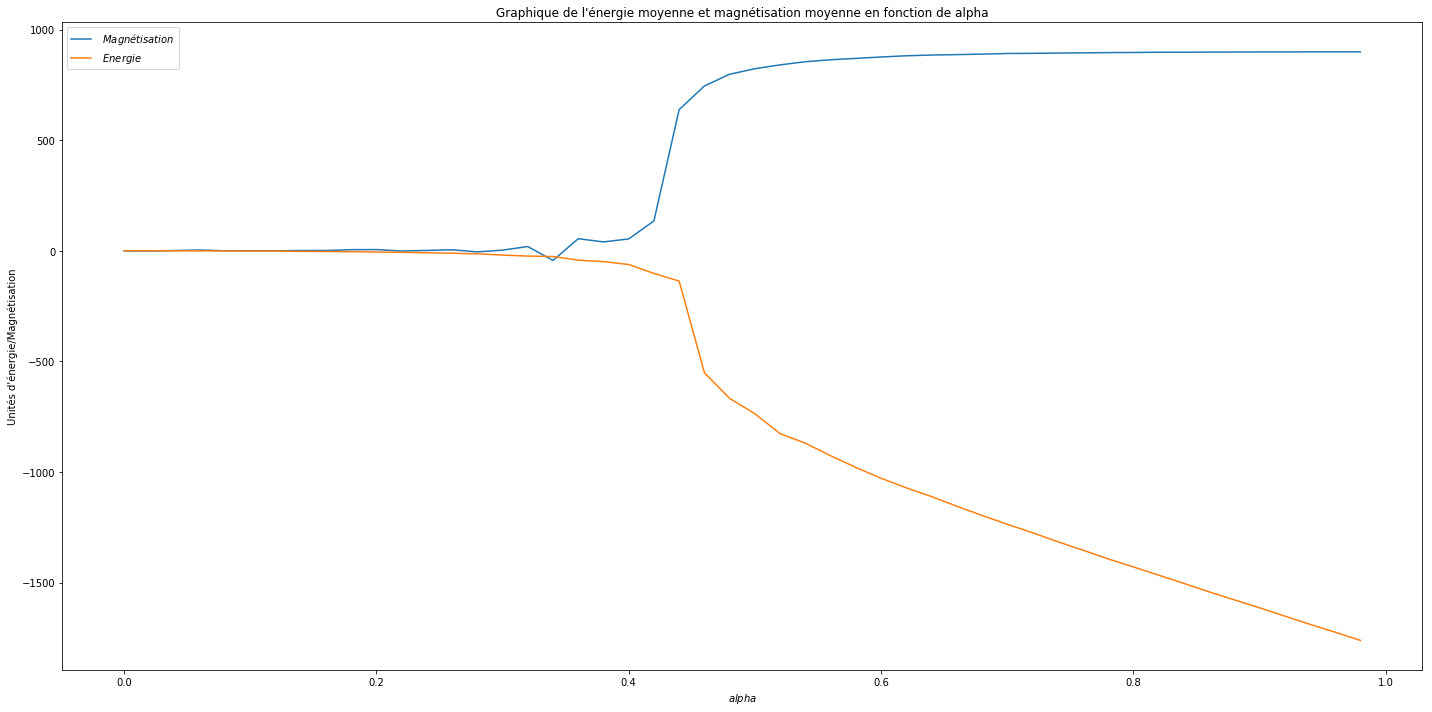

In [42]:
pyplot.figure(figsize=(20,10))

pyplot.title("Graphique de l'énergie moyenne et magnétisation moyenne en fonction de alpha")
pyplot.xlabel('$alpha$')
pyplot.ylabel("Unités d'énergie/Magnétisation")

pyplot.plot(list_alpha,magn_moy_finale,label=r'$\ Magnétisation$')
pyplot.plot(list_alpha,energie_moy_finale,label=r'$\ Energie$')

pyplot.legend()
pyplot.tight_layout()


On constate qu'on a bien un changement brutal de la magnétisation moyenne du système en fer aux alentours de $\alpha = 0.44$, comme prévu par la théorie. Ce changement semble se stabilisé près des valeurs aux alentours de $\alpha = 0,7$.

## Conclusion Challenge n°2

Nous avons donc fait une étude de la magnétisation et de l'energie moyenne partant d'une grille de spins initiale, avec différents alphas. On voit de suite que le facteur alpha joue une rôle central dans l'apparition des propriétés de férromagnétisme. A partir d'un alpha critique calculé à partir de la solution exacte de Onsager, on voit en effet ces propriétés de férromagnétisme appraître dans notre modèle. 

# Challenge n°3

- Redo the analysis with a different set of boundary conditions for the lattice and a different initial lattice configuration. For example, you could assume that on the borders all the spins are pointing upwards on the borders while they are randomly oriented in the bulk.

A présent, on va considérer que le système carré de spins est enfermé dans une boîte en 2 dimensions très froid de telle manière à ce que les spins sur le bord extérieur du carré soient fixés à des spins ups à chaque instant. On va donc devoir modifier la fonction energy_at_site car dans ce nouveau système, les spins aux bords du carré ne prennent plus de contributions à l'extérieur du carré. De cette manière, les conditions aux bords du domaine ne sont plus périodiques.

On impose d'abord les conditions aux bords puis on redéfinit l'énergie pour que les contributions aux bords soient correctement implentées. Ici la fonction ne change pas énormément si ce n'est aux aux bords et aux 4 coins du carré, où on rédéfinit les calculs d'énergies.

In [43]:
def energy_at_site_boundary(sp,alpha,sigma,ix,iy):
    """ Donne la contribution de l'énergie pour un spin donné à la position
    ix,iy pour une grille avec des conditions aux bords périodiques
   
    Paramètres:
    ----------
    sp: numpy array
        grille de spins
    alpha  : réel
        constante de couplage J/(kb*T)
    sigma   : entier
        spin à la position ix,iy
    ix   : entier
        position en x
    iy   : entier
        position en y
    
   
    Returns:
    -------
    energy: energie de la configuration donnée
    """
   
    nx = ny = len(sp[0])
    sp[0,:] = sp[nx-1,:] = sp[:,ny-1] = sp[:,0] = 1 # on fixe le bord toujours égal à des spins ups.

    #Les 4 coins, et sigma vaut 1 donc on ne le ré-écrit pas.
    if (ix == 0 and iy == 0):
        energy=-alpha*(sp[(ix+1),iy]+sp[ix,(iy+1)])
    elif (ix ==0 and iy == ny-1):
        energy=-alpha*(sp[(ix+1),iy]+sp[ix,(iy-1)])
    elif (ix == nx-1 and  iy == 0):
        energy=-alpha*(sp[(ix-1),iy]+sp[ix,(iy+1)])
    elif (ix == nx-1 and  iy == ny-1):
        energy=-alpha*(sp[(ix-1),iy]+sp[ix,(iy-1)])
        
    #Les 4 bords, et sigma vaut 1 donc on ne le ré-écrit pas.     
    elif (ix==0):
         energy=-alpha*(sp[(ix+1),iy]+sp[ix,(iy-1)]+sp[ix,(iy+1)])
    elif (iy==0):
         energy=-alpha*(sp[(ix-1),iy]+sp[(ix+1),iy]+sp[ix,(iy+1)])
    elif (ix==nx-1):
         energy=-alpha*(sp[(ix-1),iy]+sp[ix,(iy-1)]+sp[ix,(iy+1)])
    elif (iy==ny-1):
         energy=-alpha*(sp[(ix-1),iy]+sp[(ix+1),iy]+sp[ix,(iy-1)])
    
    else:
        energy=-alpha*sigma*(sp[(ix-1),iy]+sp[(ix+1),iy]+sp[ix,(iy-1)]+sp[ix,(iy+1)])

    return energy

Si on regarde, par exemple, une grille de taille $ 3 \times 3 $ et qu'on calcule l'énergie à un de ses bords qui n'est pas un coin du système, on devrait obtenir une energie de $-0,6$  alors qu'au centre on devrait obtenir $-0,8$.

In [44]:
nx = ny = 3
sp = numpy.ones([nx,ny])
alpha=0.2
print(energy_at_site_boundary(sp,alpha,1,1,2))
print(energy_at_site_boundary(sp,alpha,1,1,1))
print (sp)

-0.6000000000000001
-0.8
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Ca marche! On peut donc continuer.

On doit également modifier metropolis_at_site car, dans ce nouveau système, on ne veut plus inverser les spins sur les bords du carré dans la boîte en deux dimensions. Il suffit juste de ne prendre en compte que les spins sans compter le bord pour appliquer metropolis.

In [45]:
def metropolis_at_site_boundary(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        grille de spins
    alpha  : real
        constante de couplage J/(kb*T)
    ix   : int
        position en x
    iy   : int
        position en y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site_boundary(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site_boundary(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        if(ix!=0):
            if(iy!=0):
                if(ix!=nx-1):
                    if(iy!=ny-1):
                        sp[ix,iy]=-sp[ix,iy]

Vérifions que les bords sont bien toujours égaux à 1, en essayant de changer le spin d'un des bords, par exemple l'un des coins d'une grille de taille $3 \times 3$.

In [46]:
nx = ny = 3
sp = numpy.ones([nx,ny])
metropolis_at_site_boundary(sp,0.5,2,2)
print (sp)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Rien ne change comme prévu.

Il faut simplement adapter la fonction "ising_model_metropolis" afin qu'elle utilise la fonction "metropolis_at_site_boundary", et le tour est joué!

In [47]:
def ising_model_metropolis_boundary(sp, NMC, nx, ny, alpha):
    """ Crée une séquence d'états pour le model d'Ising en utilisant l'algorithme 
    de Metropolis.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    nx   : entier
        points de discrétisation selon x
    ny   : entier
        points de discrétisation selon y
    NMC  : int
        Nombre d'états à créer
    alpha  : réel
        constante de couplage J/(kb*T)
    Returns:
    -------
    states: séquence d'états
    """
    
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)    
            metropolis_at_site_boundary(sp,alpha,ix,iy) 
        states[i]=sp.copy()   
    return states

Regardons rapidement l'évolution du système pour une grille petite, et vérifions que les bords sont biens toujours les mêmes.

In [48]:
nx=15
ny=15

NMC=100
sp = numpy.ones([nx,ny])
alpha=0.1
states_0_1 = ising_model_metropolis_boundary(sp, NMC, nx, ny, alpha)

alpha=0.2
sp = numpy.ones([nx,ny])
states_0_2 = ising_model_metropolis_boundary(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=0.4
states_0_4 = ising_model_metropolis_boundary(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=0.55
states_0_55 = ising_model_metropolis_boundary(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=0.7
states_0_7 = ising_model_metropolis_boundary(sp, NMC, nx, ny, alpha)

sp = numpy.ones([nx,ny])
alpha=1.0
states_1 = ising_model_metropolis_boundary(sp, NMC, nx, ny, alpha)

In [49]:
fig = pyplot.figure(figsize=(6,3))

pyplot.subplot(1, 3, 1)
img01 = pyplot.imshow(states_0_1[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 3, 2)
img02 = pyplot.imshow(states_0_2[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 3, 3)
img04 = pyplot.imshow(states_0_4[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img01.set_array(states_0_1[i])
    img02.set_array(states_0_2[i])
    img04.set_array(states_0_4[i])
    
anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
pyplot.close()
HTML(anim.to_html5_video())

In [50]:
fig = pyplot.figure(figsize=(6,3))

pyplot.subplot(1, 3, 1)
img055 = pyplot.imshow(states_0_55[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 3, 2)
img07 = pyplot.imshow(states_0_7[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 3, 3)
img1 = pyplot.imshow(states_1[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

def animate(i):
    img055.set_array(states_0_55[i])
    img07.set_array(states_0_7[i])
    img1.set_array(states_1[i])
    
anim1 = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
pyplot.close()
HTML(anim1.to_html5_video()) 

On obtient bien comme prévu des bords qui ne changent jamais, et des états fluctuant avec la valeur de alpha, comme dans la première partie de cette analyse.

Maitenant faisons l'analyse avec ces nouvelles conditions de bords. Ici encore, nous devons adapter les fonctions utilisées précédement, en utilisant les nouvelles fonctions "energy_at_site_boundary" et "metropolis_at_site_boundary".

In [51]:
def energy_one_config_boundary(sp_test,alpha):
    """ Calcule l'energie d'une grille de spins avec les nouvelles conditions aux bord.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    
    Returns:
    -------
    Energie_tot/2 = energie totale de la configuration divisée par deux
    car on somme sur les paires de spins
    """
    
    Energie_tot= 0
    for m in range(nx):
        for l in range(ny):
            sigma=sp_test[l,m]
            Energie_tot=energy_at_site_boundary(sp_test,alpha,sigma,m,l)+Energie_tot
    return Energie_tot/2 

In [52]:
def average_energy_boundary(states,alpha,NMC,j):
    """ Calcule l'energie moyenne d'une succéssion de configurations, pour un même alpha, avec les nouvelles conditions aux bords.
    
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha  : reél
        constante de couplage J/(kb*T)
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    j : int
        Indice qui caractérise l'état à partir duquel on considère que le système est à l'équilibre
        
    Returns:
    -------
    en_moy_norm = liste des énergies moyennes pour chaque suite d'états.
    """
    en_moy_norm = numpy.empty(NMC+1-j+1)
    en_moy_norm[0] =  energy_one_config_boundary(states[j-1],alpha)
    en_moy_non_norm = numpy.zeros(NMC+1-j+1)
    en_moy_non_norm[0] = energy_one_config_boundary(states[j-1],alpha)

    for n in range(1,NMC+1-j+1):
        en_moy_non_norm[n] = (energy_one_config_boundary(states[n+j-1],alpha) + en_moy_non_norm[n-1])
     
    for m in range(1,NMC+1-j+1):
        en_moy_norm[m]=(en_moy_non_norm[m]/(m+1))
        
        
    return en_moy_norm

In [53]:
def magn_one_config_boundary(sp_test):
    """ Calcule la magnétisation d'une grille de spins avec les nouvelles conditions aux bords.
   
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    
    Returns:
    -------
    magn_tot = magnétisation totale de la configuration.
    """
    nx = ny = len(sp_test[0])
    sp_test[0,:] = sp_test[nx-1,:] = sp_test[:,ny-1] = sp_test[:,0] = 1
    magn_tot=0.
    for m in range(nx):
        for l in range(ny):
            sigma=sp_test[l,m]
            magn_tot=sigma+magn_tot
    return magn_tot   

In [54]:
def average_magn_boundary(states,NMC,j):
    """ Calcule la magnétisation moyenne d'une à partir du moment ou l'état d'équilibre est atteint, avec les nouvelles 
    conditions aux bords
    Paramètres:
    ----------
    sp   : numpy array
        grille initiale
    alpha: réel
        constante de couplage (J/kbT)
    NMC : int
        Nombre d'itérations faites par l'algorithme de Metropolis.
    j : int
        Indice qui caractérise l'état à partir duquel on considère que le système est à l'équilibre
    
    Returns:
    -------
    magn_moy_norm = liste des magnétisations moyennes pour chaque suite d'états, lorsque l'état d'équilibre est atteint
    """
    magn_moy_norm = numpy.zeros(NMC+1-j+1)
    magn_moy_norm[0] = magn_one_config_boundary(states[j-1])
    magn_moy_non_norm = numpy.zeros(NMC+1-j+1)
    magn_moy_non_norm[0] =  magn_one_config_boundary(states[j-1])
    
    for n in range(1,NMC+1-j+1):
        magn_moy_non_norm[n] = (magn_one_config_boundary(states[n+j-1]) + magn_moy_non_norm[n-1])
       
    for m in range(1,NMC+1-j+1):
        magn_moy_norm[m]= (magn_moy_non_norm[m])/(m+1)
            
    return magn_moy_norm

Maitenant que toutes nos fonctions ont été adaptées pour nos nouvelles conditions aux bords, nous avons allons dresser le graphique de l'énergie moyenne est aussi de la magnétisation moyenne en fonction d'alpha, comme dans le premier challenge.

Redéfinissons notre liste de coefficients alpha:

In [55]:
list_alpha=numpy.arange(0,1,0.02)
print(list_alpha)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


Maitenant calculons les quantités recherchées (Attention cette partie du code prend aussi ~15 min):

In [56]:
nx=ny=40
energie_moy_finale = numpy.zeros(len(list_alpha))
energie_moy_non_finale = numpy.zeros(len(list_alpha))

for n in range (len(list_alpha)):
    if (list_alpha[n] > 0.3 and list_alpha[n] < 0.6):
        NMC = 2500
        j=2001
    else:
        NMC=535
        j=36
    r = numpy.ones((nx,ny))
    states=ising_model_metropolis_boundary(r,NMC,nx,ny,list_alpha[n])
    energie_moy_non_finale = average_energy_boundary(states,list_alpha[n],NMC,j)
    u=len(energie_moy_non_finale)
    energie_moy_finale[n] = energie_moy_non_finale[u-1] #Seule l'energie moyenne finale nous interesse, donc on prend le dernier élement de cette liste.

In [57]:
magn_moy_non_finale = numpy.zeros(len(list_alpha))
magn_moy_finale = numpy.zeros(len(list_alpha))


for n in range (len(list_alpha)):
    if (list_alpha[n] > 0.3 and list_alpha[n] < 0.6):
        NMC = 2500
        j=2001
    else:
        NMC=535
        j=36
    r = numpy.ones((nx,ny))
    states=ising_model_metropolis_boundary(r,NMC,nx,ny,list_alpha[n])
    magn_moy_non_finale = average_magn_boundary(states,NMC,j)
    magn_moy_finale[n] = magn_moy_non_finale[u-1]#Seule la magnétisation moyenne finale nous interesse, donc on prend le dernier élement de cette liste.


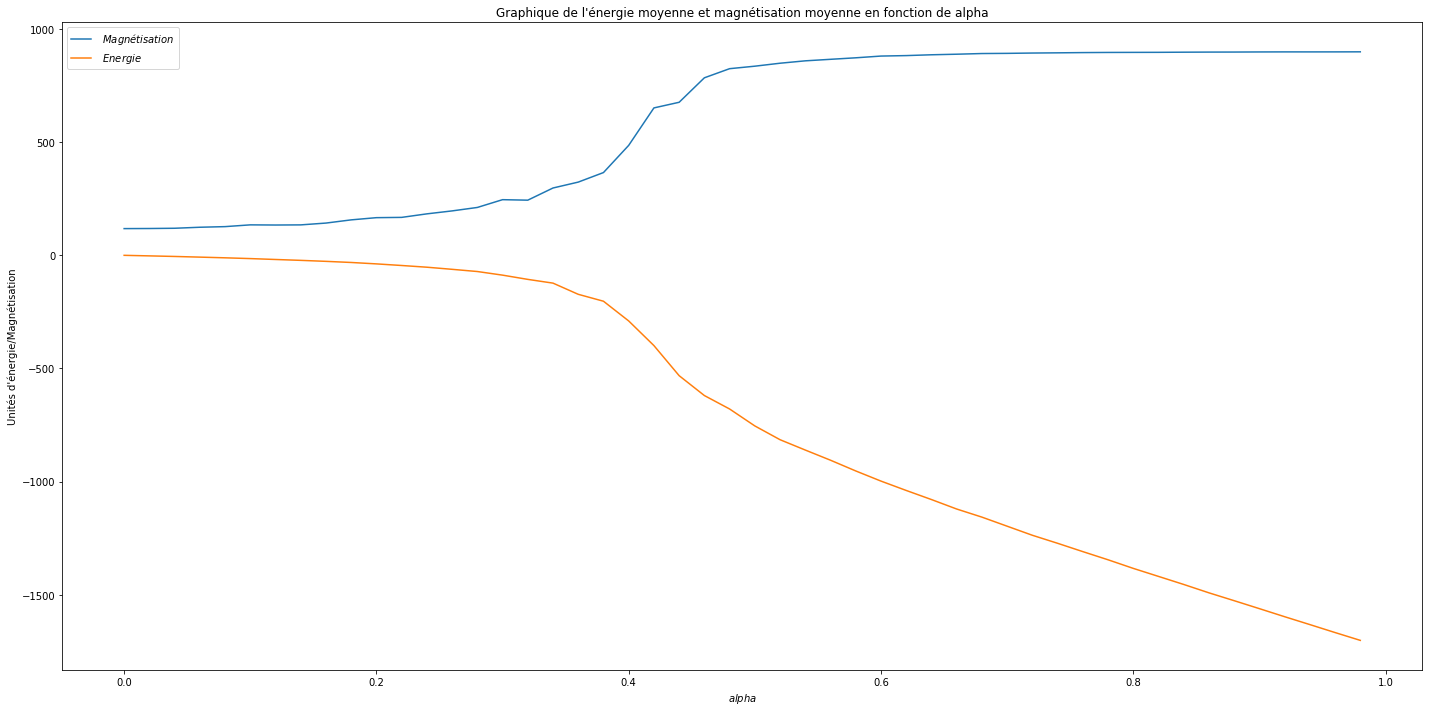

In [58]:
pyplot.figure(figsize=(20,10))

pyplot.title("Graphique de l'énergie moyenne et magnétisation moyenne en fonction de alpha")
pyplot.xlabel('$alpha$')
pyplot.ylabel("Unités d'énergie/Magnétisation")

pyplot.plot(list_alpha,magn_moy_finale,label=r'$\ Magnétisation$')
pyplot.plot(list_alpha,energie_moy_finale,label=r'$\ Energie$')

pyplot.legend()
pyplot.tight_layout()

On obtient un graphique tout à fait semblable à celui obtenu précédement. C'est ce qui était attendu. En effet, l'énergie du système dépend en effet du bord, mais si la grille est grande, les effets de bords seront tout à fait négligeables par rapport aux système interne.

# Conclusion Challenge n°3

Avec des conditions aux bords différentes, nous obtenons un graphique tout à fait semblable ce qui est normal. Même si les problèmes physiques sont souvent gouvernés par les conditions aux bords, le modèle d'ising est un modèle qui permet de décrire un matériaux férromagnétique pour n'importe quelle condition de bord.

Ceci conclut les challenges du module "Ising Model".